Downloading...
From (original): https://drive.google.com/uc?export=download&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
From (redirected): https://drive.google.com/uc?export=download&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV&confirm=t&uuid=316ba65e-c0bd-4999-b0f0-c31dd28aba9a
To: /content/fraud_data.csv
100%|██████████| 494M/494M [00:50<00:00, 9.78MB/s]


Dataset loaded successfully.
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Missing values in each column:
 step              0
type              0
amou

<ipython-input-7-560a37d980e6>:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object
Non-numeric columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Data types after encoding:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


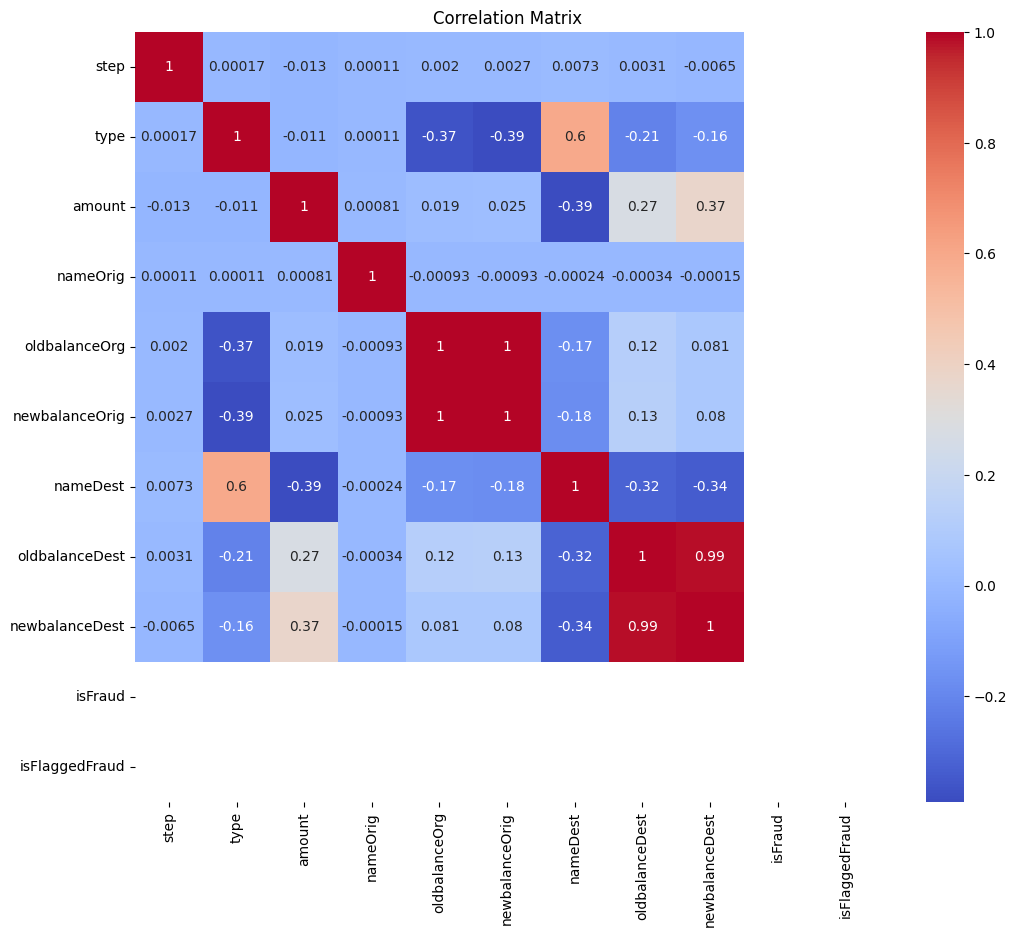

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1806030

    accuracy                           1.00   1806030
   macro avg       1.00      1.00      1.00   1806030
weighted avg       1.00      1.00      1.00   1806030

Accuracy: 1.0


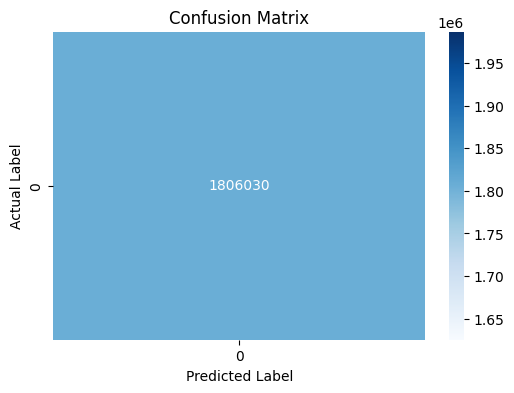

Model saved as fraud_detection_model.pkl
Predictions saved as fraud_predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from scipy import stats
import joblib  # To save the model
import gdown

# Step 1: Download and Load the Dataset from Google Drive using gdown
url = 'https://drive.google.com/uc?export=download&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV'
output = 'fraud_data.csv'
gdown.download(url, output, quiet=False)

# Load the dataset
data = pd.read_csv(output)
print("Dataset loaded successfully.")

# Step 2: Explore and Clean the Data
# Check the first few rows of the data
print(data.head())

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Handle missing values if present (using forward fill as an example)
data.fillna(method='ffill', inplace=True)

# Check for duplicates and remove them
data.drop_duplicates(inplace=True)

# Check the data types and describe numerical columns
print("Data types:\n", data.dtypes)

# Step 3: Handle Outliers using z-score
# Detect and remove outliers using z-score
data_numeric = data.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(data_numeric))
data_cleaned = data[(z_scores < 3).all(axis=1)].copy()

# Step 4: Identify and Encode Non-Numeric Columns
# Identify non-numeric columns
non_numeric_columns = data_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Apply Label Encoding to all non-numeric columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data_cleaned.loc[:, column] = label_encoder.fit_transform(data_cleaned[column])

# Ensure all columns are now numeric
print("Data types after encoding:\n", data_cleaned.dtypes)

# Step 5: Correlation Matrix for Feature Selection (Optional Step)
# Compute correlation matrix and visualize it (Optional)
corr_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 6: Train-Test Split
# 'isFraud' is the target column
X = data_cleaned.drop(['isFraud'], axis=1)
y = data_cleaned['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Model Building - Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = rf.predict(X_test)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Step 9: Save the Model for Submission
# Save the trained model to a file
model_filename = 'fraud_detection_model.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved as {model_filename}")

# Step 10: Predict Fraud for the Entire Dataset
# Using the trained model to predict fraud in the entire cleaned dataset
data_cleaned['isFraudPrediction'] = rf.predict(data_cleaned.drop(['isFraud'], axis=1))

# Step 11: Save the Predictions to a CSV File for Submission
submission_filename = 'fraud_predictions.csv'
data_cleaned[['nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFraudPrediction']].to_csv(submission_filename, index=False)
print(f"Predictions saved as {submission_filename}")

from google.colab import files
import joblib

# Save the model as a .pkl file
model_filename = 'fraud_detection_model.pkl'
joblib.dump(rf, model_filename)

# Download the model file from Colab to your local machine
files.download(model_filename)
